<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/PRO/CNNFlowers/CNNFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
imsparsh_flowers_dataset_path = kagglehub.dataset_download('imsparsh/flowers-dataset')

print('Data source import complete.')

Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Clasificación de Imágenes de Flores con Redes Neuronales Convolucionales**

Este proyecto tiene como objetivo construir y comparar varios modelos de redes neuronales convolucionales (CNN) para clasificar imágenes de flores en cinco categorías:
- **Dandelion**
- **Daisy**
- **Sunflower**
- **Tulip**
- **Rose**


## **1. Configuración del Entorno y Carga de Librerías**

Este bloque de código importa las librerías necesarias para realizar el análisis, preprocesar los datos y construir modelos de redes neuronales convolucionales. Además, establece el entorno adecuado para trabajar con TensorFlow y Keras.



In [ ]:
# Configuración del entorno y carga de librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0, ResNet50, InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración para reducir logs de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


## **2. Carga y Preprocesamiento de Datos**

Este código utiliza `ImageDataGenerator` para manejar datasets organizados en subcarpetas. Las imágenes se redimensionan, normalizan, y dividen en entrenamiento y validación automáticamente.

**Beneficios:**
- Detecta automáticamente las clases a partir de las subcarpetas.
- Aplica técnicas de data augmentation como rotaciones, desplazamientos y zoom.
- Simplifica el manejo de datasets con gran cantidad de imágenes.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración de parámetros
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Crear generadores de datos
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Generador de entrenamiento
train_generator = data_gen.flow_from_directory(
    "/kaggle/input/flowers-dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador de validación
validation_generator = data_gen.flow_from_directory(
    "/kaggle/input/flowers-dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Clases detectadas
print("Clases detectadas:", train_generator.class_indices)


Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.
Clases detectadas: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


## **3. Definición y Entrenamiento de un Modelo Básico de CNN**

Este modelo sirve como referencia para comparar el rendimiento de las arquitecturas más avanzadas. Incluye:
- Capas convolucionales para extraer características.
- Capas de MaxPooling para reducir la dimensionalidad.
- Capas densas para la clasificación.

**Hiperparámetros del modelo:**
- Tamaño de entrada: 224x224x3.
- Número de clases: 5.
- Función de activación: ReLU para capas convolucionales y softmax para la capa de salida.


In [ ]:
from tensorflow.keras.layers import Input

# Definir modelo básico de CNN
modelo_basico = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compilar el modelo
modelo_basico.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo utilizando los generadores automáticos
historial_basico = modelo_basico.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.2921 - loss: 1.6456 - val_accuracy: 0.4197 - val_loss: 1.3093
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.4618 - loss: 1.2461 - val_accuracy: 0.5164 - val_loss: 1.1862
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.5092 - loss: 1.1470 - val_accuracy: 0.5547 - val_loss: 1.0977
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 300s 4s/step - accuracy: 0.5481 - loss: 1.1082 - val_accuracy: 0.5931 - val_loss: 1.1163
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.5630 - loss: 1.0527 - val_accuracy: 0.5803 - val_loss: 1.0135
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.5927 - loss: 0.9881 - val_accuracy: 0.5894 - val_loss: 1.0481
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.6338 - loss: 0.9295 - val_accuracy: 0.6004 - val_loss: 1.0049
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.6218 - loss: 0.9393 - val_accuracy: 0.6442 - v

## **4. Transfer Learning: ¿Qué es y por qué usarlo?**

**Transfer Learning** consiste en emplear modelos previamente entrenados en grandes datasets (como *ImageNet*) y ajustarlos para una tarea específica, como la clasificación de imágenes de flores. Esta técnica es especialmente valiosa en escenarios donde:

- Disponemos de **datos limitados** para entrenar desde cero.
- Necesitamos **acelerar el entrenamiento** y obtener **resultados de alta precisión rápidamente**.
- Queremos aprovechar modelos ya optimizados que han demostrado un rendimiento robusto en tareas similares.



## **4 Modelo : DenseNet121**

**Razón de elección:**  
DenseNet121 es una arquitectura avanzada que logra un **balance excepcional entre precisión y uso eficiente de parámetros**. DenseNet utiliza conexiones densas entre capas, lo que permite que cada capa acceda directamente a las salidas de capas previas. Esta estrategia de conexión mejora el flujo de información y gradientes en la red, maximizando la eficiencia del aprendizaje.

Este modelo destaca en tareas donde se requiere un aprendizaje profundo con características complejas, como en la clasificación de flores, incluso en **datasets con clases que presentan similitudes visuales significativas**.

**Ventajas:**
- Excelente capacidad de aprendizaje en datasets medianos y grandes.
- Las conexiones densas reducen el riesgo de sobreajuste y problemas de gradientes desaparecidos.
- Robusto para trabajar en problemas con alta variabilidad entre clases.
- Beneficia de la transferencia directa de características aprendidas en ImageNet.

**Desventajas:**
- Más demandante en términos computacionales en comparación con arquitecturas como EfficientNetB0.
- La necesidad de descongelar capas superiores podría implicar mayor tiempo de entrenamiento en datasets específicos.
- No es ideal para dispositivos con recursos extremadamente limitados.

DenseNet121 es una opción ideal para problemas que requieren una **gran capacidad de aprendizaje y manejo de representaciones complejas**, como el Flowers Dataset.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input # Añadir Input
from tensorflow.keras.models import Model

# Definir explícitamente la capa de entrada
input_tensor = Input(shape=(224, 224, 3)) # Nueva línea

# Crear modelo base DenseNet121 SIN especificar input_shape aquí
# Pasaremos nuestro input_tensor explícito
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_tensor) # Modificada
base_model_densenet.trainable = False  # Congelar capas preentrenadas

# Añadir capas personalizadas
x = base_model_densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions_densenet = Dense(train_generator.num_classes, activation='softmax')(x)

# Construir el modelo final usando nuestro input_tensor explícito
densenet_model = Model(inputs=input_tensor, outputs=predictions_densenet) # Modificada

# Compilar el modelo (sin cambios)
densenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo utilizando los generadores automáticos (sin cambios)
history_densenet = densenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10, # Puedes ajustar las épocas si es necesario reentrenar
    verbose=1
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 616s 9s/step - accuracy: 0.6014 - loss: 1.0357 - val_accuracy: 0.8577 - val_loss: 0.4197
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 536s 8s/step - accuracy: 0.8540 - loss: 0.4027 - val_accuracy: 0.8540 - val_loss: 0.3791
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 539s 8s/step - accuracy: 0.8914 - loss: 0.2892 - val_accuracy: 0.8376 - val_loss: 0.4149
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 534s 8s/step - accuracy: 0.8875 - loss: 0.2986 - val_accuracy: 0.8741 - val_loss: 0.3681
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 528s 8s/step - accuracy: 0.9037 - loss: 0.2589 - val_accuracy: 0.8942 - val_loss: 0.3178
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 568s 8s/step - accuracy: 0.9104 - loss: 0.2342 - val_accuracy: 0.8394 - val_loss: 0.4258
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 530s 8s/step - accuracy: 0.9170 - loss: 0.2369 - val_accuracy: 0.8850 - val_loss: 0.2823
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 532s 8s/step - accuracy: 0.9286 - loss: 0.2009 - val_accuracy: 0.8704 - v

## **5. Evaluación y Comparación de Modelos**

En esta sección, evaluaremos el rendimiento de los modelos utilizando:
1. **Matriz de Confusión**: Visualiza los aciertos y errores en la clasificación.
2. **Reporte de Clasificación**: Resume las métricas de precisión, recall y F1-score por clase.
3. **Gráficos de Precisión y Pérdida**: Comparan el rendimiento durante el entrenamiento.

Evaluaremos cada modelo implementado y presentaremos un análisis comparativo para determinar cuál es el más adecuado para la tarea.


=== Evaluación del Modelo Básico ===
Clases detectadas en el generador: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Distribución de las clases en validación: [100 129  99  99 121]

Generando predicciones para el conjunto de validación...
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step

Resultados de precisión global del modelo en validación:
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6582 - loss: 0.9304
{'loss': 0.8840145468711853, 'compile_metrics': 0.6405109763145447}

Reporte de Clasificación:
              precision    recall  f1-score   support

       daisy       0.81      0.67      0.73       100
   dandelion       0.75      0.72      0.74       129
        rose       0.50      0.55      0.52        99
   sunflower       0.57      0.84      0.68        99
       tulip       0.59      0.43      0.50       121

    accuracy                           0.64       548
   macro avg       0.64      0.64      0.63       548
weighted avg       0.65      0.64     

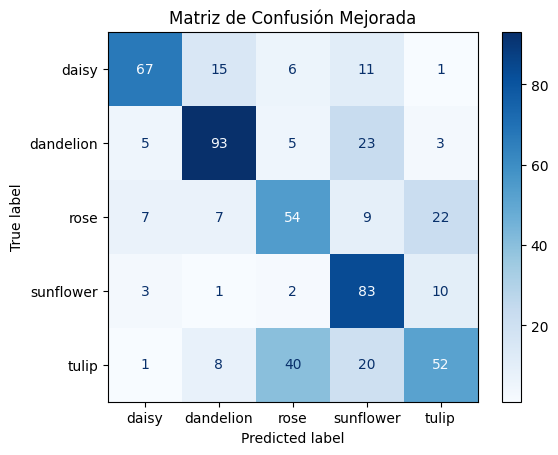


=== Evaluación del Modelo DenseNet121 ===
Clases detectadas en el generador: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Distribución de las clases en validación: [100 129  99  99 121]

Generando predicciones para el conjunto de validación...
18/18 ━━━━━━━━━━━━━━━━━━━━ 122s 6s/step

Resultados de precisión global del modelo en validación:
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.8541 - loss: 0.3978
{'loss': 0.38158655166625977, 'compile_metrics': 0.8594890236854553}

Reporte de Clasificación:
              precision    recall  f1-score   support

       daisy       0.95      0.94      0.94       100
   dandelion       0.96      0.78      0.86       129
        rose       0.92      0.71      0.80        99
   sunflower       0.86      0.94      0.90        99
       tulip       0.71      0.93      0.80       121

    accuracy                           0.86       548
   macro avg       0.88      0.86      0.86       548
weighted avg       0.88      0

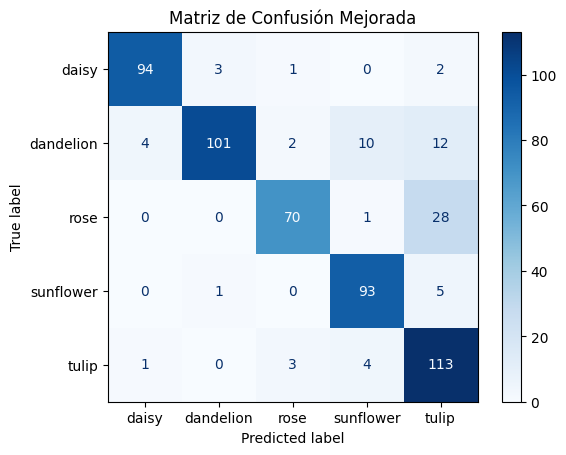

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Validar estructura del generador de validación
def validar_generador(generador_validacion):
    print("Clases detectadas en el generador:", generador_validacion.class_indices)
    print("Distribución de las clases en validación:", np.bincount(generador_validacion.classes))

# Función para evaluar el modelo y generar reportes
def evaluar_modelo(modelo, generador_validacion, nombres_clases):
    validar_generador(generador_validacion)

    # Generar predicciones
    print("\nGenerando predicciones para el conjunto de validación...")
    y_pred_probs = modelo.predict(generador_validacion)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_clases = generador_validacion.classes  # Clases reales desde el generador

    # Evaluar precisión global del modelo
    print("\nResultados de precisión global del modelo en validación:")
    resultados = modelo.evaluate(generador_validacion, verbose=1)
    print(dict(zip(modelo.metrics_names, resultados)))

    # Generar reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test_clases, y_pred, target_names=nombres_clases))

    # Matriz de Confusión mejorada
    print("\nGenerando matriz de confusión:")
    matriz_confusion = confusion_matrix(y_test_clases, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=nombres_clases)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Matriz de Confusión Mejorada")
    plt.show()

# Función para evaluar imágenes individuales
def evaluar_imagen_individual(modelo, generador_validacion, nombres_clases):
    index = random.randint(0, len(generador_validacion[0][0]) - 1)
    imagen, etiqueta_real = generador_validacion[0][0][index], generador_validacion[0][1][index]

    # Mostrar la imagen
    plt.imshow(imagen)
    plt.title(f"Etiqueta real: {nombres_clases[np.argmax(etiqueta_real)]}")
    plt.axis('off')
    plt.show()

    # Predicción del modelo
    prediccion = modelo.predict(np.expand_dims(imagen, axis=0))
    etiqueta_predicha = nombres_clases[np.argmax(prediccion)]
    print(f"Etiqueta predicha por el modelo: {etiqueta_predicha}")

# Nombres de las clases detectadas
nombres_clases = list(validation_generator.class_indices.keys())

# Evaluar Modelo Básico
print("\n=== Evaluación del Modelo Básico ===")
evaluar_modelo(modelo_basico, validation_generator, nombres_clases)

# Evaluar Modelo DenseNet121
print("\n=== Evaluación del Modelo DenseNet121 ===")
evaluar_modelo(densenet_model, validation_generator, nombres_clases)

## **6. Comparativa de Rendimiento**

A continuación, presentamos una comparación gráfica del rendimiento de los modelos implementados en términos de precisión y pérdida durante el entrenamiento.

El análisis nos permitirá identificar fortalezas y debilidades de cada modelo y tomar decisiones informadas sobre cuál es el más adecuado para la tarea de clasificación de flores.


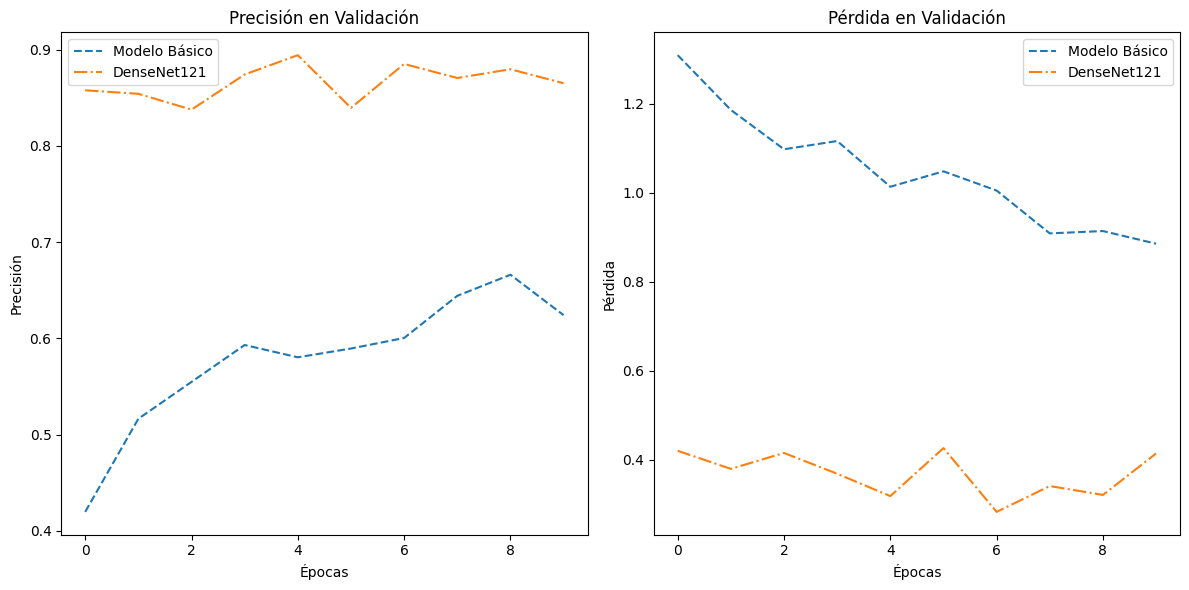

In [ ]:
plt.figure(figsize=(12, 6))

# Precisión en validación
plt.subplot(1, 2, 1)
plt.plot(historial_basico.history['val_accuracy'], label="Modelo Básico", linestyle='--')
plt.plot(history_densenet.history['val_accuracy'], label="DenseNet121", linestyle='-.')
plt.title("Precisión en Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

# Pérdida en validación
plt.subplot(1, 2, 2)
plt.plot(historial_basico.history['val_loss'], label="Modelo Básico", linestyle='--')
plt.plot(history_densenet.history['val_loss'], label="DenseNet121", linestyle='-.')
plt.title("Pérdida en Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# -------------------------------------------
# Exportar modelo a TensorFlow.js
# -------------------------------------------

# 1. Exportar el modelo entrenado en formato TensorFlow SavedModel
densenet_model.export('flowers_model_savedmodel')
print("Modelo exportado en formato SavedModel en la carpeta 'flowers_model_savedmodel'")


In [ ]:
# Asegúrate de que la carpeta 'flowers_model_savedmodel' existe en este directorio
!tensorflowjs_converter --input_format=tf_saved_model flowers_model_savedmodel web_model_tfsm